## EDA on Movies Dataset

## Dataset Description
The dataset contains information on 9000+ movies fetched using the TMDB API and cleaned using pandas and numpy libraries.

## Columns Description:

-Release_Date: Date when the movie was released.

-Title: Name of the movie.

-Overview: Brief summary of the movie.

-Popularity: It is a very important metric computed by TMDB developers based on the number of views per day, votes per day, number of users marked it as "favorite" and "watchlist" for the data, release date and more other metrics.

-Vote_Count: Total votes received from the viewers.

-Vote_Average: Average rating based on vote count and the number of viewers out of 10.

-Original_Language: Original language of the movies. Dubbed version is not considered to be original language. 

-Genre: Categories the movie it can be classified as.

-Poster_Url: Url of the movie poster.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("mymoviedb.csv",lineterminator='\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.shape

(9827, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [61]:
df.dtypes

Release_Date          object
Title                 object
Popularity           float64
Vote_Count             int64
Vote_Average         float64
Original_Language     object
Genre                 object
Publish Year           int64
dtype: object

In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [7]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Data Cleaning

Exract the years from the release date column and insert it into a new column 'Publish Year'

In [9]:
df['Publish Year']=pd.to_datetime(df['Release_Date']).dt.year

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Publish Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


### Drop the URL Posters column 

In [11]:
df.drop(labels='Poster_Url', axis=1, inplace=True)
df.head(1)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Publish Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",2021


### Drop the Overview column

In [15]:
df.drop(labels='Overview', axis=1, inplace=True)
df.head(1)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Publish Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action,2021


## Work on the Genre column

   ### Split the genres initially

In [12]:
counts= df['Genre'].value_counts()
counts

Drama                                            466
Comedy                                           403
Drama, Romance                                   248
Horror                                           238
Horror, Thriller                                 199
                                                ... 
Drama, Horror, Thriller, Science Fiction           1
Action, Science Fiction, Animation, Adventure      1
Comedy, Fantasy, Horror, Science Fiction           1
Drama, Science Fiction, Animation                  1
War, Drama, Science Fiction                        1
Name: Genre, Length: 2337, dtype: int64

In [13]:
df["Genre"]= df["Genre"].str.split(',').str[0]
df["Genre"].unique()

array(['Action', 'Crime', 'Thriller', 'Animation', 'Horror',
       'Science Fiction', 'Fantasy', 'Romance', 'Drama', 'Western',
       'Family', 'Comedy', 'Adventure', 'Mystery', 'TV Movie',
       'Documentary', 'War', 'Music', 'History'], dtype=object)

In [14]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Publish Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,Animation,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,Action,2021


In [17]:
votes=df['Vote_Average'].value_counts()
votes

6.4     435
6.3     429
6.5     427
6.8     423
6.7     420
       ... 
2.2       1
9.2       1
1.5       1
3.1       1
10.0      1
Name: Vote_Average, Length: 74, dtype: int64

# Data Visualization

## Visualize our data and answer our questions.

### Q1(1) -Which year had the most published movies?

In [64]:
sns.set_style('white')

<AxesSubplot:title={'center':'Publish Year'}>

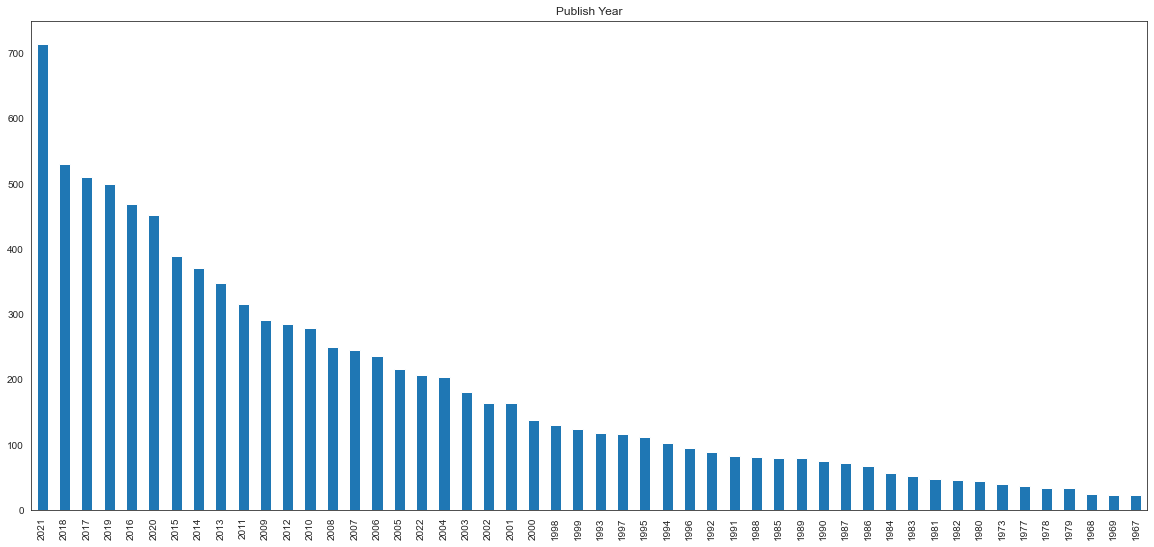

In [65]:
df['Publish Year'].value_counts()[:50].plot(kind='bar', title='Publish Year', figsize=(20,9))

### The answer is the year 2021.

### Q1(2) -Which year had the least published movies?

### The answer is the year 1967.

### Q2- Which genre has the highest number of movies?

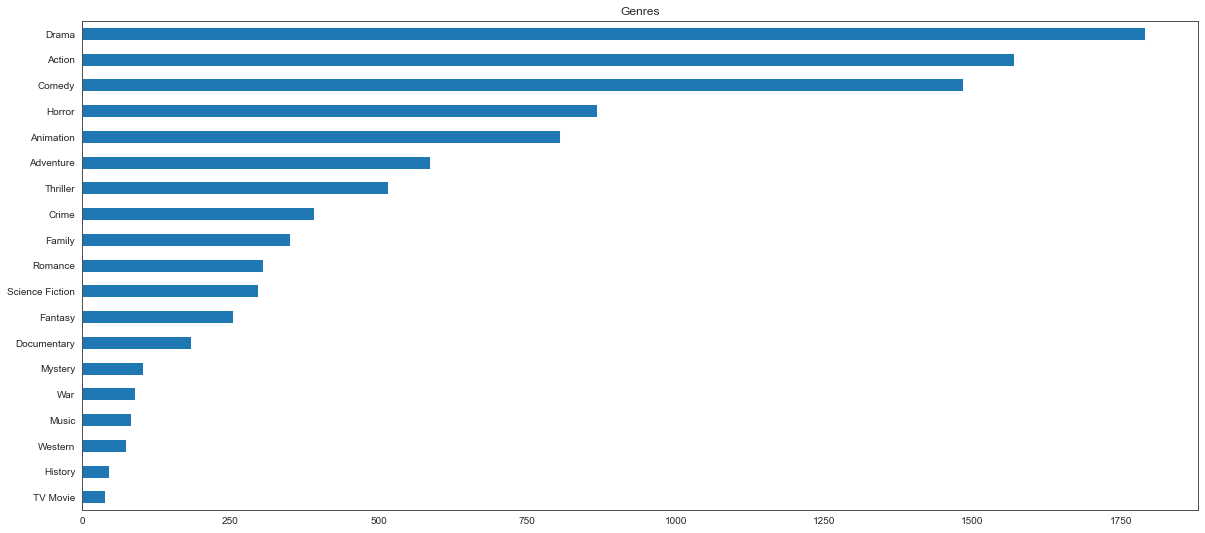

In [74]:
df['Genre'].value_counts().plot(kind = 'barh', title = 'Genres', figsize=(20,9))
plt.gca().invert_yaxis()

### The answer is the Drama genre.

### Q3(1) - Which movies had the biggest views? In other words, what movies were the most popular?

In [22]:
most_popular=df['Popularity'].nlargest(n=5)
most_popular

0    5083.954
1    3827.658
2    2618.087
3    2402.201
4    1895.511
Name: Popularity, dtype: float64

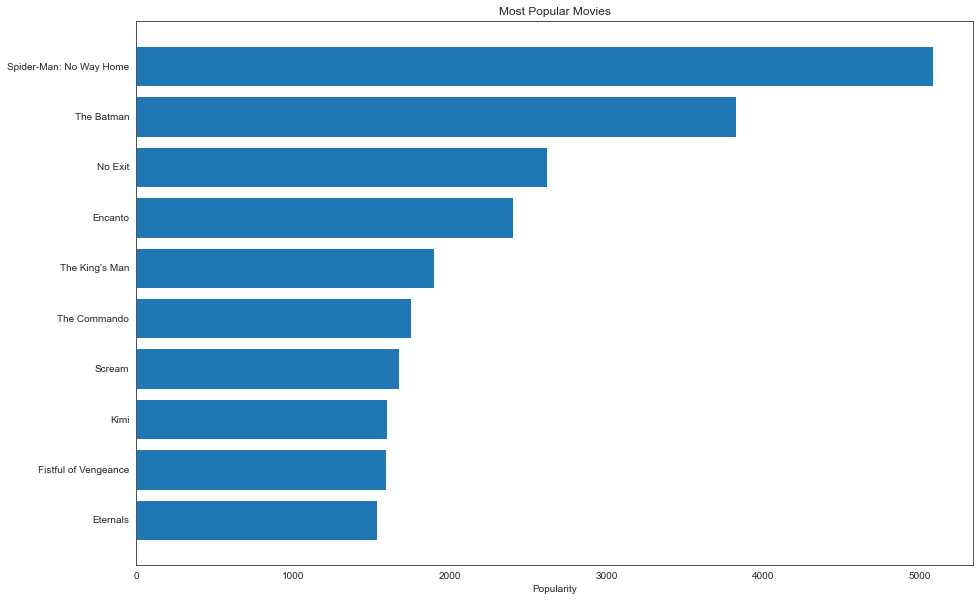

In [75]:
most_popular= df.sort_values('Popularity', ascending=False)
plt.figure(figsize=(15,10))

plt.barh(most_popular['Title'].head(10),most_popular['Popularity'].head(10))
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Most Popular Movies");

### The top 5 movies are: Spider-Man: No Way Home, The Batman, No Exit, Encanto & The King's Man

### Q3(2) - Which genre were those movies?

In [24]:
df[['Title','Genre']][:10]

,Title,Genre
0,Spider-Man: No Way Home,Action
1,The Batman,Crime
2,No Exit,Thriller
3,Encanto,Animation
4,The King's Man,Action
5,The Commando,Action
6,Scream,Horror
7,Kimi,Thriller
8,Fistful of Vengeance,Action
9,Eternals,Science Fiction


### Q4- Which movies had the highest ratings?

In [25]:
highest_ratings= df.sort_values('Vote_Average', ascending=False)
highest_ratings.head(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Publish Year
9391,2020-04-09,Kung Fu Master Huo Yuanjia,13.745,1,10.0,zh,Action,2020
7339,2018-06-08,Franco Escamilla: Por La Anécdota,16.158,92,9.2,es,Comedy,2018
667,2019-03-29,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,86.689,27,9.1,ja,Action,2019
2325,2021-06-17,Impossible Things,36.466,82,9.1,es,Family,2021
7401,2020-10-30,My Sex Doll,16.088,4,9.0,th,Comedy,2020
7014,2018-05-16,Sex School: Dorms of Desire,16.683,1,9.0,en,Comedy,2018
6728,2021-11-18,Mission «Sky»,17.133,34,9.0,ru,Drama,2021
2391,2020-10-14,The Three Deaths of Marisela Escobedo,35.767,183,9.0,es,Documentary,2020
7039,2019-08-07,Bring the Soul: The Movie,16.652,323,8.9,ko,Music,2019
5069,2021-08-19,"Ni tuyo, Ni mía",20.696,49,8.9,es,Drama,2021


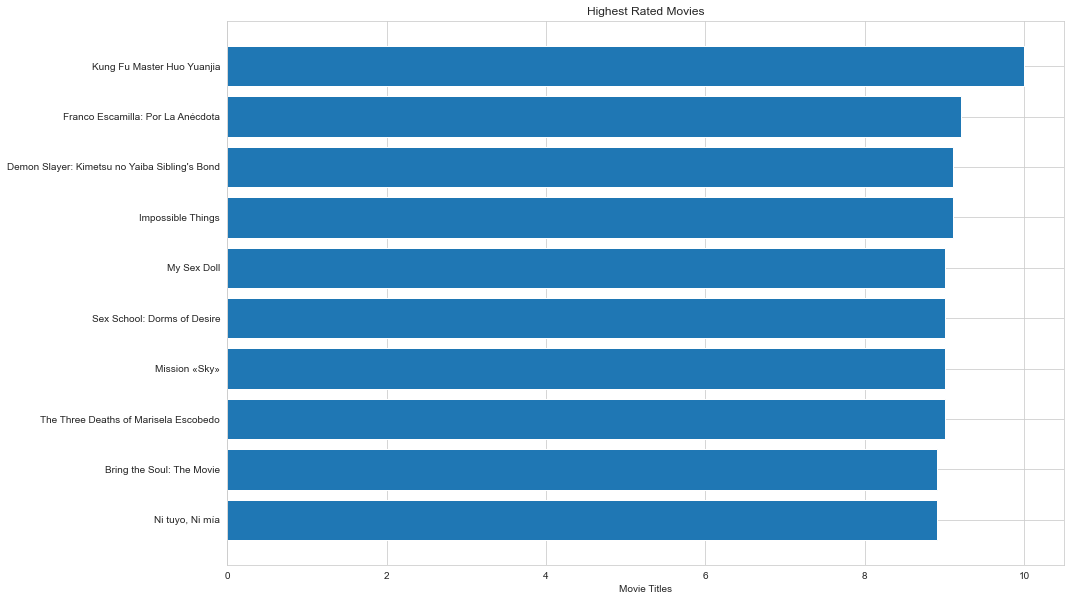

In [26]:
highest_ratings= df.sort_values('Vote_Average', ascending=False)
plt.figure(figsize=(15,10))

plt.barh(highest_ratings['Title'].head(10),highest_ratings['Vote_Average'].head(10))
plt.gca().invert_yaxis()
plt.xlabel("Movie Titles")
plt.title("Highest Rated Movies");

### Q5- What are the most popular movie languages?

In [27]:
df['Original_Language'].value_counts()

en    7570
ja     645
es     339
fr     292
ko     170
zh     129
it     123
cn     109
ru      83
de      82
pt      37
da      28
no      26
hi      26
sv      23
nl      21
pl      17
th      17
id      15
tr      15
tl       8
te       6
el       5
fi       5
sr       5
cs       4
fa       3
hu       3
is       2
ro       2
uk       2
ta       2
ar       2
he       2
ca       1
la       1
nb       1
bn       1
ms       1
lv       1
eu       1
ml       1
et       1
Name: Original_Language, dtype: int64

### We see from the output above that English is the most popular movie language, followed by Japanese, Spanish, French and Korean.


In [59]:
df['Original_Language'].value_counts()

en       7570
Other     682
ja        645
es        339
fr        292
ko        170
zh        129
Name: Original_Language, dtype: int64

### The Movie Languages Visualization of the top Languages.

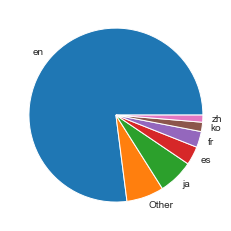

In [60]:
plt.pie(df['Original_Language'].value_counts(),labels=df['Original_Language'].value_counts().index)
plt.show()

### As seen here, the English language is the most frequent.

# THE END